Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary Statistics:
                  age workclass        fnlwgt educati

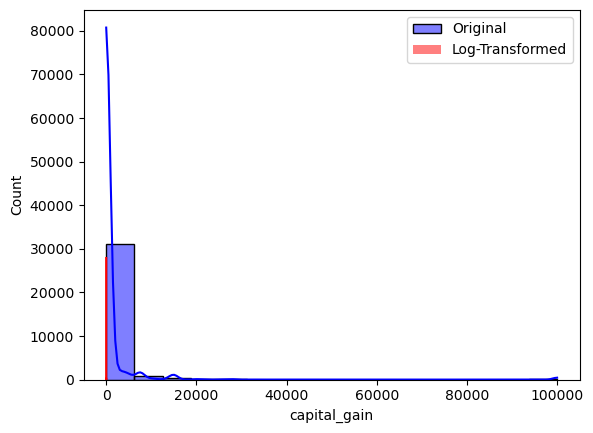


Data Shape After Outlier Removal: (30933, 18)

Mutual Information Scores:
 capital_gain      0.070575
age               0.066794
education_num     0.056193
hours_per_week    0.037743
fnlwgt            0.029525
capital_loss      0.011547
dtype: float64

Feature Importances from Random Forest:
 fnlwgt            0.431684
age               0.203777
capital_gain      0.124194
education_num     0.113693
hours_per_week    0.102873
capital_loss      0.023779
dtype: float64


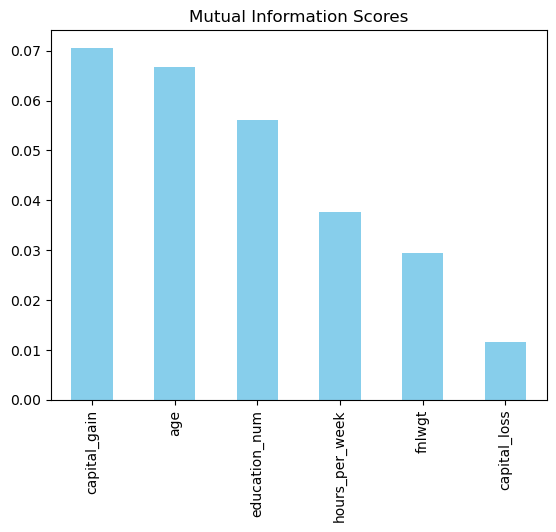

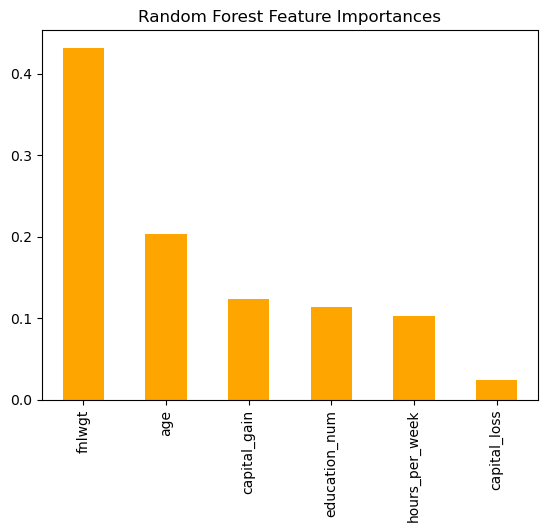

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\User\Downloads\EDA2\EDA2\adult_with_headers.csv'
data = pd.read_csv(file_path)

# Task 1: Data Exploration and Preprocessing
# 1.1 Basic data exploration
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:\n", data.describe(include="all"))
print("\nMissing Values:\n", data.isnull().sum())

# 1.2 Handle missing values (for this example, assume no missing values)
# If there were missing values, we could fill or drop them as needed.

# 1.3 Apply scaling to numerical features
numerical_columns = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

print("\nStandard Scaled Data (First Rows):\n", data_standard_scaled.head())
print("\nMin-Max Scaled Data (First Rows):\n", data_minmax_scaled.head())

# Task 2: Encoding Techniques
# 2.1 Apply One-Hot Encoding to categorical variables with less than 5 unique categories
categorical_columns = ["race", "sex", "income"]
data_ohe = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 2.2 Apply Label Encoding for categorical variables with more than 5 unique categories
le_columns = ["workclass", "education", "marital_status", "occupation", "relationship", "native_country"]
label_encoders = {}
data_le = data.copy()

for col in le_columns:
    le = LabelEncoder()
    data_le[col] = le.fit_transform(data_le[col])
    label_encoders[col] = le

print("\nLabel Encoded Data (First Rows):\n", data_le.head())

# Task 3: Feature Engineering
# 3.1 Create new features
data["age_bin"] = pd.cut(data["age"], bins=[0, 25, 50, 75, 100], labels=["young", "middle-aged", "senior", "elderly"])
data["hours_bin"] = pd.cut(data["hours_per_week"], bins=[0, 20, 40, 60, 80], labels=["low", "medium", "high", "very high"])

# 3.2 Apply log transformation to capital_gain (skewed numerical feature)
data["log_capital_gain"] = np.log1p(data["capital_gain"])

# Visualize transformation
sns.histplot(data["capital_gain"], kde=True, color="blue", label="Original")
sns.histplot(data["log_capital_gain"], kde=True, color="red", label="Log-Transformed")
plt.legend()
plt.show()

# Task 4: Feature Selection
# 4.1 Outlier removal using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(data[numerical_columns])
data_no_outliers = data[outliers == 1]

print("\nData Shape After Outlier Removal:", data_no_outliers.shape)

# 4.2 Feature relationships using Mutual Information
X = data_no_outliers[numerical_columns]
y = LabelEncoder().fit_transform(data_no_outliers["income"])  # Encode target variable
mutual_info = mutual_info_classif(X, y, discrete_features=False)

# Display Mutual Information Scores
mi_scores = pd.Series(mutual_info, index=numerical_columns).sort_values(ascending=False)
print("\nMutual Information Scores:\n", mi_scores)

# 4.3 Feature Importance using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=numerical_columns).sort_values(ascending=False)

print("\nFeature Importances from Random Forest:\n", feature_importances)

# Visualize Feature Relationships
mi_scores.plot(kind="bar", title="Mutual Information Scores", color="skyblue")
plt.show()

feature_importances.plot(kind="bar", title="Random Forest Feature Importances", color="orange")
plt.show()
